<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 3

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

Пояснения к признакам набора данных:

• AGREEMENT_RK — уникальный идентификатор объекта в выборке;

• TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);

• AGE — возраст клиента;

• SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);

• SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);

• GENDER — пол клиента (1 — мужчина, 0 — женщина);

• CHILD_TOTAL — количество детей клиента;

• DEPENDANTS — количество иждивенцев клиента;

• PERSONAL_INCOME — личный доход клиента (в рублях);

• LOAN_NUM_TOTAL — количество ссуд клиента;

• LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('ClientsData.csv', sep=',')

In [6]:
df

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,25,1,0,0,1,1,12000.0,3,2,0,0
15219,51,1,0,1,2,0,10000.0,1,0,0,0
15220,22,1,0,1,1,1,6000.0,1,0,0,0
15221,60,0,1,1,2,0,4500.0,1,0,0,0


In [4]:
df.isna().sum()

,0
AGE,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
PERSONAL_INCOME,0
LOAN_NUM_TOTAL,0
LOAN_NUM_CLOSED,0
LOAN_DLQ_NUM,0


пропусков нет

In [5]:
df[df.duplicated()]

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
130,35,1,0,1,1,1,15000.0,1,1,0,0
208,27,1,0,0,1,1,15000.0,1,1,0,0
226,48,1,0,1,0,0,15000.0,1,1,0,0
254,38,1,0,0,2,2,10000.0,1,1,0,0
270,55,1,0,0,0,0,20000.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15211,35,1,0,1,1,1,10000.0,1,1,0,0
15213,36,1,0,0,0,0,15000.0,1,0,0,1
15215,35,1,0,1,1,1,9500.0,1,0,0,0
15217,39,1,0,1,1,1,10000.0,1,0,0,0


Удалим дубликаты

In [7]:
df = df.drop(df[df.duplicated()].index)

In [8]:
df[df.duplicated()]

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET


Больше дубликатов нет.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12404 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                12404 non-null  int64  
 1   SOCSTATUS_WORK_FL  12404 non-null  int64  
 2   SOCSTATUS_PENS_FL  12404 non-null  int64  
 3   GENDER             12404 non-null  int64  
 4   CHILD_TOTAL        12404 non-null  int64  
 5   DEPENDANTS         12404 non-null  int64  
 6   PERSONAL_INCOME    12404 non-null  float64
 7   LOAN_NUM_TOTAL     12404 non-null  int64  
 8   LOAN_NUM_CLOSED    12404 non-null  int64  
 9   LOAN_DLQ_NUM       12404 non-null  int64  
 10  TARGET             12404 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.1 MB


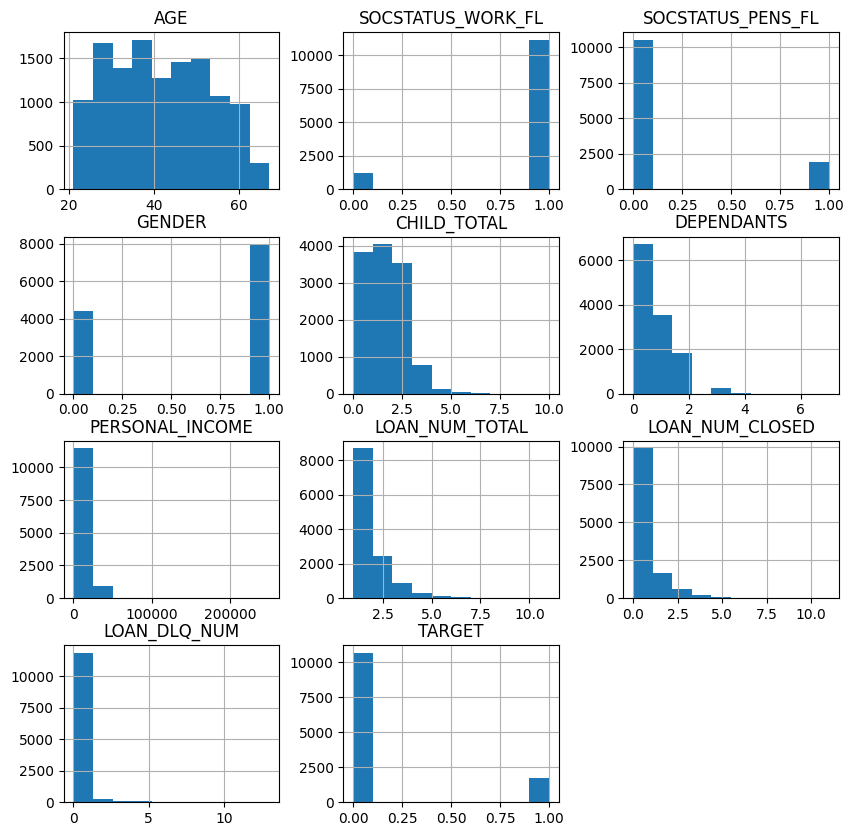

In [10]:
df.hist(figsize=(10, 10));

In [12]:
df.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
count,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000
mean,41.456304,0.899065,0.153096,0.643099,1.163254,0.655353,14106.510025,1.456546,0.829329,0.233957,0.137778
std,11.541404,0.301255,0.360094,0.479105,1.025295,0.833935,9620.496226,0.851157,1.039791,0.749805,0.344681
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,1.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000,0.000000,0.000000
max,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000,13.000000,1.000000


Нормализация численных признаков

In [13]:
from sklearn import preprocessing

In [14]:
min_max_Scaler = preprocessing.MinMaxScaler()
col = df.columns
result = min_max_Scaler.fit_transform(df)
df_scaler = pd.DataFrame(result, columns = col)

In [15]:
df_scaler.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
count,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000
mean,0.444702,0.899065,0.153096,0.643099,0.116325,0.093622,0.056335,0.045655,0.075394,0.017997,0.137778
std,0.250900,0.301255,0.360094,0.479105,0.102530,0.119134,0.038486,0.085116,0.094526,0.057677,0.344681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239130,1.000000,0.000000,0.000000,0.000000,0.000000,0.031907,0.000000,0.000000,0.000000,0.000000
50%,0.434783,1.000000,0.000000,1.000000,0.100000,0.000000,0.047909,0.000000,0.090909,0.000000,0.000000
75%,0.652174,1.000000,0.000000,1.000000,0.200000,0.142857,0.067911,0.100000,0.090909,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


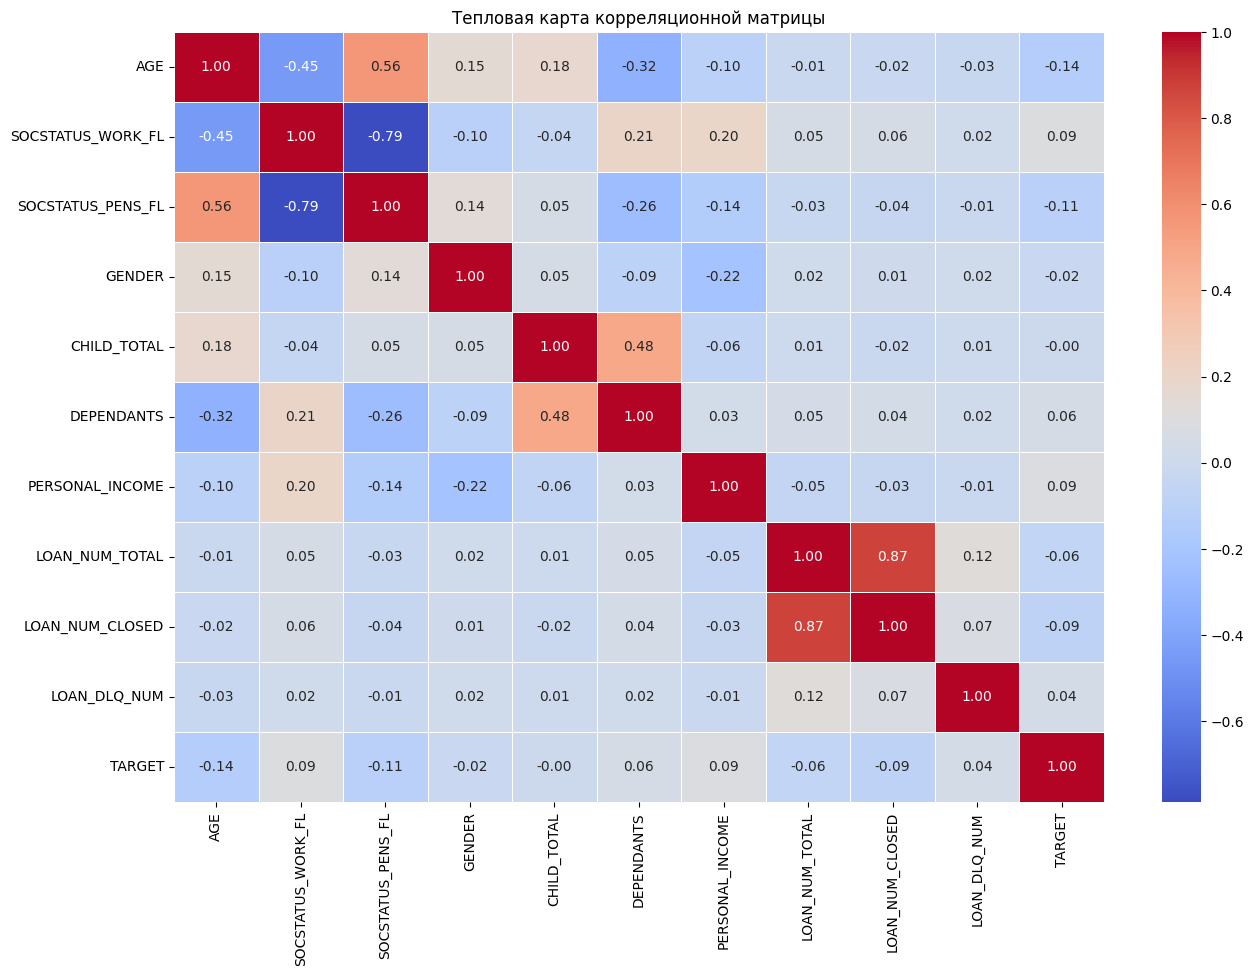

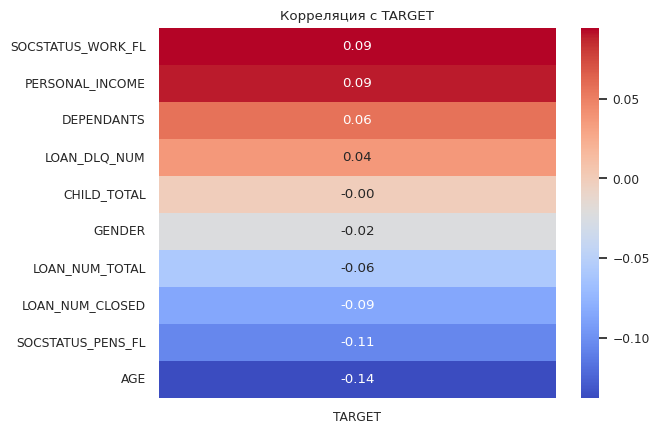

In [16]:
correlation_matrix = df_scaler.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = df_scaler.corr()
target_corr = corr['TARGET'].drop('TARGET')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с TARGET')
plt.show()

# Создание модели линейной регрессии

Разделение на обучающую и тестовую выборки

In [18]:
X = df_scaler.drop(["TARGET"], axis=1)
y = df_scaler["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проверим качество модели на обучающей и тестовой выборках с помощью MAE, MSE и R2.

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'Результаты на обучающей выборке:,\
\nMSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

Результаты на обучающей выборке:,
MSE: 0.11491601669289872,
MAE :0.23061854813146013,
 R2: 0.03433274015385568


In [20]:
y_test_pred = lr.predict(X_test)
print(f'Результаты на тестовой выборке:,\
\nMSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

Результаты на тестовой выборке:,
MSE: 0.11292044283105267,
MAE :0.2294021466101148,
 R2: 0.042790640477441855
